### Import libraries

In [1]:
import numpy as np 
import pandas as pd

In [2]:
# Run this only once
%cd ../../

d:\dev\project\Football-Match-Prediction


### Read data

In [3]:
df = pd.read_csv('data/raw/all_teams_data.csv')
pd.options.display.max_columns = None
df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss_x,Attendance,Captain,Formation,Opp Formation,Referee,Notes,Standard__Gls,Standard__Sh,Standard__SoT,Standard__SoT%,Standard__G/Sh,Standard__G/SoT,Standard__Dist,Standard__FK,Standard__PK,Standard__PKatt,Expected__xG,Expected__npxG,Expected__npxG/Sh,Expected__G-xG,Expected__np:G-xG,Performance__SoTA,Performance__GA,Performance__Saves,Performance__Save%,Performance__CS,Performance__PSxG,Performance__PSxG+/-,Penalty Kicks__PKatt,Penalty Kicks__PKA,Penalty Kicks__PKsv,Penalty Kicks__PKm,Launched__Cmp,Launched__Att,Launched__Cmp%,Passes__Att (GK),Passes__Thr,Passes__Launch%,Passes__AvgLen,Goal Kicks__Att,Goal Kicks__Launch%,Goal Kicks__AvgLen,Crosses__Opp,Crosses__Stp,Crosses__Stp%,Sweeper__#OPA,Sweeper__AvgDist,Total__Cmp,Total__Att,Total__Cmp%,Total__TotDist,Total__PrgDist,Short__Cmp,Short__Att,Short__Cmp%,Medium__Cmp,Medium__Att,Medium__Cmp%,Long__Cmp,Long__Att,Long__Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,Att,Pass Types__Live,Pass Types__Dead,Pass Types__FK,Pass Types__TB,Pass Types__Sw,Pass Types__Crs,Pass Types__TI,Pass Types__CK,Corner Kicks__In,Corner Kicks__Out,Corner Kicks__Str,Outcomes__Cmp,Outcomes__Off,Outcomes__Blocks,SCA Types__SCA,SCA Types__PassLive,SCA Types__PassDead,SCA Types__TO,SCA Types__Sh,SCA Types__Fld,SCA Types__Def,GCA Types__GCA,GCA Types__PassLive,GCA Types__PassDead,GCA Types__TO,GCA Types__Sh,GCA Types__Fld,GCA Types__Def,Tackles__Tkl,Tackles__TklW,Tackles__Def 3rd,Tackles__Mid 3rd,Tackles__Att 3rd,Challenges__Tkl,Challenges__Att,Challenges__Tkl%,Challenges__Lost,Blocks__Blocks,Blocks__Sh,Blocks__Pass,Int,Tkl+Int,Clr,Err,Poss_y,Touches__Touches,Touches__Def Pen,Touches__Def 3rd,Touches__Mid 3rd,Touches__Att 3rd,Touches__Att Pen,Touches__Live,Take-Ons__Att,Take-Ons__Succ,Take-Ons__Succ%,Take-Ons__Tkld,Take-Ons__Tkld%,Carries__Carries,Carries__TotDist,Carries__PrgDist,Carries__PrgC,Carries__1/3,Carries__CPA,Carries__Mis,Carries__Dis,Receiving__Rec,Receiving__PrgR,Performance__CrdY,Performance__CrdR,Performance__2CrdY,Performance__Fls,Performance__Fld,Performance__Off,Performance__Crs,Performance__Int,Performance__TklW,Performance__PKwon,Performance__PKcon,Performance__OG,Performance__Recov,Aerial Duels__Won,Aerial Duels__Lost,Aerial Duels__Won%,Season,Team
0,2017-08-18,20:15,La Liga,Matchweek 1,Fri,Away,L,0,1,Leganés,1.1,1.3,47.0,9231.0,Manu García,4-4-2,4-2-3-1,José Munuera,NaN,0,8.0,4.0,50.0,0.0,0.0,22.8,0.0,0,1,1.1,0.4,0.04,-1.1,-0.4,3.0,1.0,2.0,66.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,21.0,23.8,30.0,4.0,46.7,33.0,7.0,100.0,57.3,11.0,1.0,9.1,2.0,14.3,252.0,385.0,65.5,4587.0,1900.0,119.0,145.0,82.1,98.0,138.0,71.0,33.0,82.0,40.2,0,0.3,0.4,7.0,19.0,2.0,0.0,18.0,385.0,330.0,55.0,19.0,1.0,5.0,10.0,25.0,2.0,1.0,0.0,1.0,252.0,0.0,10.0,15.0,7.0,3.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,13.0,10.0,9.0,0.0,8.0,15.0,53.3,7.0,14.0,5.0,9.0,14.0,33,17.0,1.0,47.0,503.0,47.0,200.0,222.0,89.0,10.0,502.0,18.0,8.0,44.4,10.0,55.6,235.0,1359.0,652.0,10.0,8.0,4.0,19.0,13.0,250.0,18.0,1,0,0,17.0,17.0,0.0,10.0,14.0,13.0,1.0,0.0,0.0,60.0,16.0,30.0,34.8,2017,Alaves
1,2017-08-26,18:15,La Liga,Matchweek 2,Sat,Home,L,0,2,Barcelona,0.9,2.5,27.0,19356.0,Manu García,4-5-1,4-3-3,Carlos del Cerro,NaN,0,11.0,2.0,18.2,0.0,0.0,21.7,2.0,0,0,0.9,0.9,0.09,-0.9,-0.9,11.0,2.0,8.0,81.8,0.0,2.3,0.3,1.0,0.0,1.0,0.0,10.0,17.0,58.8,26.0,4.0,53.8,38.9,5.0,60.0,48.6,13.0,0.0,0.0,0.0,7.7,202.0,281.0,71.9,3959.0,1914.0,85.0,99.0,85.9,73.0,97.0,75.3,34.0,67.0,50.7,0,0.8,0.3,6.0,14.0,1.0,0.0,13.0,281.0,257.0,23.0,7.0,1.0,4.0,5.0,7.0,1.0,1.0,0.0,0.0,202.0,1.0,4.0,19.0,9.0,2.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,18.0,19.0,4.0,2.0,11.0,32.0,34.4,21.0,14.0,7.0,7.0,15.0,40,30.0,1.0,27.0,396.0,80.0,213.0,140.0,48.0,9.0,396.0,16.0,8.0,50.0,8.0,50.0,258.0,1290.0,662.0,7.0,2.0,4.0,10.0,5.0,199.0,13.0,2,0,0,12.0,9.0,1.0,5.0,15.0,18.0,0.0,1.0,0.0,57.0,8.0,6.0,57.1,2017,Alaves
2,2017-09-10,18:30,La Liga,Matchweek 3,Sun,Away,L,0,1,Celta Vigo,0.5,2.7,34.0,17384.0,Fernando Pacheco,4-

In [4]:
df['Comp'].value_counts()

Comp
La Liga                5520
Copa del Rey            540
Champions Lg            281
Europa Lg               228
Supercopa de España      36
Conf Lg                  17
Super Cup                 8
Name: count, dtype: int64

In [5]:
import numpy as np

# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)

# Calculate the percentage of missing values
missing_percentage = df.isnull().mean() * 100
missing_percentage[missing_percentage > 10]

Attendance          17.390649
Notes               92.202112
Sweeper__AvgDist    14.600302
dtype: float64

### Only care about la Liga data

In [6]:
df2 = df[df['Comp'] == 'La Liga']

In [7]:
df2.columns.to_list()

['Date',
 'Time',
 'Comp',
 'Round',
 'Day',
 'Venue',
 'Result',
 'GF',
 'GA',
 'Opponent',
 'xG',
 'xGA',
 'Poss_x',
 'Attendance',
 'Captain',
 'Formation',
 'Opp Formation',
 'Referee',
 'Notes',
 'Standard__Gls',
 'Standard__Sh',
 'Standard__SoT',
 'Standard__SoT%',
 'Standard__G/Sh',
 'Standard__G/SoT',
 'Standard__Dist',
 'Standard__FK',
 'Standard__PK',
 'Standard__PKatt',
 'Expected__xG',
 'Expected__npxG',
 'Expected__npxG/Sh',
 'Expected__G-xG',
 'Expected__np:G-xG',
 'Performance__SoTA',
 'Performance__GA',
 'Performance__Saves',
 'Performance__Save%',
 'Performance__CS',
 'Performance__PSxG',
 'Performance__PSxG+/-',
 'Penalty Kicks__PKatt',
 'Penalty Kicks__PKA',
 'Penalty Kicks__PKsv',
 'Penalty Kicks__PKm',
 'Launched__Cmp',
 'Launched__Att',
 'Launched__Cmp%',
 'Passes__Att (GK)',
 'Passes__Thr',
 'Passes__Launch%',
 'Passes__AvgLen',
 'Goal Kicks__Att',
 'Goal Kicks__Launch%',
 'Goal Kicks__AvgLen',
 'Crosses__Opp',
 'Crosses__Stp',
 'Crosses__Stp%',
 'Sweeper__#OPA',

In [8]:
df2.describe()

,xG,xGA,Poss_x,Attendance,Standard__Gls,Standard__Sh,Standard__SoT,Standard__SoT%,Standard__G/Sh,Standard__G/SoT,Standard__Dist,Standard__FK,Standard__PK,Standard__PKatt,Expected__xG,Expected__npxG,Expected__npxG/Sh,Expected__G-xG,Expected__np:G-xG,Performance__SoTA,Performance__GA,Performance__Saves,Performance__Save%,Performance__CS,Performance__PSxG,Performance__PSxG+/-,Penalty Kicks__PKatt,Penalty Kicks__PKA,Penalty Kicks__PKsv,Penalty Kicks__PKm,Launched__Cmp,Launched__Att,Launched__Cmp%,Passes__Att (GK),Passes__Thr,Passes__Launch%,Passes__AvgLen,Goal Kicks__Att,Goal Kicks__Launch%,Goal Kicks__AvgLen,Crosses__Opp,Crosses__Stp,Crosses__Stp%,Sweeper__#OPA,Sweeper__AvgDist,Total__Cmp,Total__Att,Total__Cmp%,Total__TotDist,Total__PrgDist,Short__Cmp,Short__Att,Short__Cmp%,Medium__Cmp,Medium__Att,Medium__Cmp%,Long__Cmp,Long__Att,Long__Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,Att,Pass Types__Live,Pass Types__Dead,Pass Types__FK,Pass Types__TB,Pass Types__Sw,Pass Types__Crs,Pass Types__TI,Pass Types__CK,Corner Kicks__In,Corner Kicks__Out,Corner Kicks__Str,Outcomes__Cmp,Outcomes__Off,Outcomes__Blocks,SCA Types__SCA,SCA Types__PassLive,SCA Types__PassDead,SCA Types__TO,SCA Types__Sh,SCA Types__Fld,SCA Types__Def,GCA Types__GCA,GCA Types__PassLive,GCA Types__PassDead,GCA Types__TO,GCA Types__Sh,GCA Types__Fld,GCA Types__Def,Tackles__Tkl,Tackles__TklW,Tackles__Def 3rd,Tackles__Mid 3rd,Tackles__Att 3rd,Challenges__Tkl,Challenges__Att,Challenges__Tkl%,Challenges__Lost,Blocks__Blocks,Blocks__Sh,Blocks__Pass,Int,Tkl+Int,Clr,Err,Poss_y,Touches__Touches,Touches__Def Pen,Touches__Def 3rd,Touches__Mid 3rd,Touches__Att 3rd,Touches__Att Pen,Touches__Live,Take-Ons__Att,Take-Ons__Succ,Take-Ons__Succ%,Take-Ons__Tkld,Take-Ons__Tkld%,Carries__Carries,Carries__TotDist,Carries__PrgDist,Carries__PrgC,Carries__1/3,Carries__CPA,Carries__Mis,Carries__Dis,Receiving__Rec,Receiving__PrgR,Performance__CrdY,Performance__CrdR,Performance__2CrdY,Performance__Fls,Performance__Fld,Performance__Off,Performance__Crs,Performance__Int,Performance__TklW,Performance__PKwon,Performance__PKcon,Performance__OG,Performance__Recov,Aerial Duels__Won,Aerial Duels__Lost,Aerial Duels__Won%,Season
count,5520.000000,5520.000000,5520.000000,4544.000000,5520.000000,5520.000000,5520.000000,5518.000000,5518.000000,5322.000000,5518.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5517.000000,5520.000000,5520.000000,5520.000000,5519.000000,5520.000000,5346.000000,5519.000000,5520.000000,5519.000000,5519.000000,5519.000000,5519.000000,5519.000000,5520.000000,5520.000000,5503.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5512.000000,5512.000000,5520.000000,5519.000000,5518.000000,5519.000000,5195.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.00000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,552

In [9]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5520 entries, 0 to 6629
Data columns (total 168 columns):
 #    Column                Dtype  
---   ------                -----  
 0    Date                  object 
 1    Time                  object 
 2    Comp                  object 
 3    Round                 object 
 4    Day                   object 
 5    Venue                 object 
 6    Result                object 
 7    GF                    object 
 8    GA                    object 
 9    Opponent              object 
 10   xG                    float64
 11   xGA                   float64
 12   Poss_x                float64
 13   Attendance            float64
 14   Captain               object 
 15   Formation             object 
 16   Opp Formation         object 
 17   Referee               object 
 18   Notes                 object 
 19   Standard__Gls         int64  
 20   Standard__Sh          float64
 21   Standard__SoT         float64
 22   Standard__SoT%        float

### Categorize the data

In [10]:
shooting_cols = df.columns[19:34].to_list()
goal_keeping_cols = df.columns[35:60].to_list()
passing_cols = df.columns[61:82].to_list()
passing_types_cols = df.columns[83:97].to_list()
goal_and_shot_creation_cols = df.columns[98:111].to_list()
defensive_actions_cols = df.columns[112:127].to_list()
possession_cols = df.columns[128:150].to_list()
miscellaneous_cols = df.columns[151:-2].to_list()

In [11]:
shooting_cols

['Standard__Gls',
 'Standard__Sh',
 'Standard__SoT',
 'Standard__SoT%',
 'Standard__G/Sh',
 'Standard__G/SoT',
 'Standard__Dist',
 'Standard__FK',
 'Standard__PK',
 'Standard__PKatt',
 'Expected__xG',
 'Expected__npxG',
 'Expected__npxG/Sh',
 'Expected__G-xG',
 'Expected__np:G-xG']

In [14]:
%cd src

d:\dev\project\Football-Match-Prediction\src


In [15]:
from preprocessing.preprocess import *
df2 = preprocess_categorical_data(df2)
df2

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss_x,Attendance,Captain,Formation,Opp Formation,Referee,Standard__Gls,Standard__Sh,Standard__SoT,Standard__SoT%,Standard__G/Sh,Standard__G/SoT,Standard__Dist,Standard__FK,Standard__PK,Standard__PKatt,Expected__xG,Expected__npxG,Expected__npxG/Sh,Expected__G-xG,Expected__np:G-xG,Performance__SoTA,Performance__GA,Performance__Saves,Performance__Save%,Performance__CS,Performance__PSxG,Performance__PSxG+/-,Penalty Kicks__PKatt,Penalty Kicks__PKA,Penalty Kicks__PKsv,Penalty Kicks__PKm,Launched__Cmp,Launched__Att,Launched__Cmp%,Passes__Att (GK),Passes__Thr,Passes__Launch%,Passes__AvgLen,Goal Kicks__Att,Goal Kicks__Launch%,Goal Kicks__AvgLen,Crosses__Opp,Crosses__Stp,Crosses__Stp%,Sweeper__#OPA,Sweeper__AvgDist,Total__Cmp,Total__Att,Total__Cmp%,Total__TotDist,Total__PrgDist,Short__Cmp,Short__Att,Short__Cmp%,Medium__Cmp,Medium__Att,Medium__Cmp%,Long__Cmp,Long__Att,Long__Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP,Att,Pass Types__Live,Pass Types__Dead,Pass Types__FK,Pass Types__TB,Pass Types__Sw,Pass Types__Crs,Pass Types__TI,Pass Types__CK,Corner Kicks__In,Corner Kicks__Out,Corner Kicks__Str,Outcomes__Cmp,Outcomes__Off,Outcomes__Blocks,SCA Types__SCA,SCA Types__PassLive,SCA Types__PassDead,SCA Types__TO,SCA Types__Sh,SCA Types__Fld,SCA Types__Def,GCA Types__GCA,GCA Types__PassLive,GCA Types__PassDead,GCA Types__TO,GCA Types__Sh,GCA Types__Fld,GCA Types__Def,Tackles__Tkl,Tackles__TklW,Tackles__Def 3rd,Tackles__Mid 3rd,Tackles__Att 3rd,Challenges__Tkl,Challenges__Att,Challenges__Tkl%,Challenges__Lost,Blocks__Blocks,Blocks__Sh,Blocks__Pass,Int,Tkl+Int,Clr,Err,Poss_y,Touches__Touches,Touches__Def Pen,Touches__Def 3rd,Touches__Mid 3rd,Touches__Att 3rd,Touches__Att Pen,Touches__Live,Take-Ons__Att,Take-Ons__Succ,Take-Ons__Succ%,Take-Ons__Tkld,Take-Ons__Tkld%,Carries__Carries,Carries__TotDist,Carries__PrgDist,Carries__PrgC,Carries__1/3,Carries__CPA,Carries__Mis,Carries__Dis,Receiving__Rec,Receiving__PrgR,Performance__CrdY,Performance__CrdR,Performance__2CrdY,Performance__Fls,Performance__Fld,Performance__Off,Performance__Crs,Performance__Int,Performance__TklW,Performance__PKwon,Performance__PKcon,Performance__OG,Performance__Recov,Aerial Duels__Won,Aerial Duels__Lost,Aerial Duels__Won%,Season,Team
0,2017-08-18 20:15:00,La Liga,1,5,0,0,0.0,1.0,Leganés,1.1,1.3,47.0,9231.0,Manu García,4-4-2,4-2-3-1,José Munuera,0,8.0,4.0,50.0,0.00,0.00,22.8,0.0,0,1,1.1,0.4,0.04,-1.1,-0.4,3.0,1.0,2.0,66.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,21.0,23.8,30.0,4.0,46.7,33.0,7.0,100.0,57.3,11.0,1.0,9.1,2.0,14.3,252.0,385.0,65.5,4587.0,1900.0,119.0,145.0,82.1,98.0,138.0,71.0,33.0,82.0,40.2,0,0.3,0.4,7.0,19.0,2.0,0.0,18.0,385.0,330.0,55.0,19.0,1.0,5.0,10.0,25.0,2.0,1.0,0.0,1.0,252.0,0.0,10.0,15.0,7.0,3.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,13.0,10.0,9.0,0.0,8.0,15.0,53.3,7.0,14.0,5.0,9.0,14.0,33,17.0,1.0,47.0,503.0,47.0,200.0,222.0,89.0,10.0,502.0,18.0,8.0,44.4,10.0,55.6,235.0,1359.0,652.0,10.0,8.0,4.0,19.0,13.0,250.0,18.0,1,0,0,17.0,17.0,0.0,10.0,14.0,13.0,1.0,0.0,0.0,60.0,16.0,30.0,34.8,2017,Alaves
1,2017-08-26 18:15:00,La Liga,2,6,1,0,0.0,2.0,Barcelona,0.9,2.5,27.0,19356.0,Manu García,4-5-1,4-3-3,Carlos del Cerro,0,11.0,2.0,18.2,0.00,0.00,21.7,2.0,0,0,0.9,0.9,0.09,-0.9,-0.9,11.0,2.0,8.0,81.8,0.0,2.3,0.3,1.0,0.0,1.0,0.0,10.0,17.0,58.8,26.0,4.0,53.8,38.9,5.0,60.0,48.6,13.0,0.0,0.0,0.0,7.7,202.0,281.0,71.9,3959.0,1914.0,85.0,99.0,85.9,73.0,97.0,75.3,34.0,67.0,50.7,0,0.8,0.3,6.0,14.0,1.0,0.0,13.0,281.0,257.0,23.0,7.0,1.0,4.0,5.0,7.0,1.0,1.0,0.0,0.0,202.0,1.0,4.0,19.0,9.0,2.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,18.0,19.0,4.0,2.0,11.0,32.0,34.4,21.0,14.0,7.0,7.0,15.0,40,30.0,1.0,27.0,396.0,80.0,213.0,140.0,48.0,9.0,396.0,16.0,8.0,50.0,8.0,50.0,258.0,1290.0,662.0,7.0,2.0,4.0,10.0,5.0,199.0,13.0,2,0,0,12.0,9.0,1.0,5.0,15.0,18.0,0.0,1.0,0.0,57.0,8.0,6.0,57.1,2017,Alaves
2,2017-09-10 18:30:00,La Liga,3,7,0,0,0.0,1.0,Celta Vigo,0.5,2.7,34.0,17384.0,Fernando Pacheco,4-1-4-1,4-3-3,Mario Melero,0,5.0,3.0,60.0

In [16]:
object_columns = df2.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Comp', 'Opponent', 'Captain', 'Formation', 'Opp Formation', 'Referee',
       'Team'],
      dtype='object')


In [17]:
import numpy as np

# Replace empty strings with NaN
df2.replace('', np.nan, inplace=True)

# Calculate the percentage of missing values
missing_percentage = df2.isnull().mean() * 100
missing_percentage[missing_percentage > 0]

Attendance              17.681159
Referee                  0.978261
Standard__SoT%           0.036232
Standard__G/Sh           0.036232
Standard__G/SoT          3.586957
Standard__Dist           0.036232
Expected__npxG/Sh        0.054348
Performance__GA          0.018116
Performance__Save%       3.152174
Performance__CS          0.018116
Performance__PSxG+/-     0.018116
Penalty Kicks__PKatt     0.018116
Penalty Kicks__PKA       0.018116
Penalty Kicks__PKsv      0.018116
Penalty Kicks__PKm       0.018116
Launched__Cmp%           0.307971
Goal Kicks__Launch%      0.144928
Goal Kicks__AvgLen       0.144928
Crosses__Stp             0.018116
Crosses__Stp%            0.036232
Sweeper__#OPA            0.018116
Sweeper__AvgDist         5.887681
dtype: float64

#### How many seasons are there ?

In [32]:
num_seasons = df['Season'].nunique()
print(f'There are {num_seasons} seasons in the data.')

There are 8 seasons in the data.


#### How many teams are there ?

In [37]:
num_teams = df['Team'].nunique()
print(f'There are {num_teams} teams in the data.')

There are 29 teams in the data.


#### Overall results of each team through out 8 seasons

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of wins, draws, and losses for each team
results = df2.groupby('Team')['Result'].value_counts().unstack().fillna(0)
results.columns = ['Draws', 'Losses', 'Wins']
# Calculate total matches and win, draw, loss percentages
results['Total Matches'] = results.sum(axis=1)
results['Win %'] = (results['Wins'] / results['Total Matches']) * 100
results['Draw %'] = (results['Draws'] / results['Total Matches']) * 100
results['Loss %'] = (results['Losses'] / results['Total Matches']) * 100

# Sort the columns order
results = results[['Total Matches', 'Wins', 'Win %', 'Draws', 'Draw %', 'Losses', 'Loss %']]

# Add 'Team' column
results = results.reset_index()

,Team,Total Matches,Wins,Win %,Draws,Draw %,Losses,Loss %
0,Alaves,238,70,29.411765,117,49.159664,51,21.428571
1,Almeria,76,14,18.421053,42,55.263158,20,26.315789
2,Athletic Club,276,99,35.869565,90,32.608696,87,31.521739
3,Atletico Madrid,276,162,58.695652,45,16.304348,69,25.000000
4,Barcelona,276,187,67.753623,36,13.043478,53,19.202899
5,Cadiz,152,35,23.026316,64,42.105263,53,34.868421
6,Celta Vigo,276,81,29.347826,115,41.666667,80,28.985507
7,Deportivo La Coruna,38,6,15.789474,21,55.263158,11,28.947368
8,Eibar,152,42,27.631579,66,43.421053,44,28.947368
9,Elche,114,24,21.052632,59,51.754386,31,27.192982


Which teams have the highest win %

In [45]:
results.sort_values(by='Win %', ascending=False)

,Team,Total Matches,Wins,Win %,Draws,Draw %,Losses,Loss %
4,Barcelona,276,187,67.753623,36,13.043478,53,19.202899
23,Real Madrid,276,180,65.217391,38,13.768116,58,21.014493
3,Atletico Madrid,276,162,58.695652,45,16.304348,69,25.000000
25,Sevilla,276,121,43.840580,82,29.710145,73,26.449275
24,Real Sociedad,276,117,42.391304,88,31.884058,71,25.724638
28,Villarreal,276,115,41.666667,89,32.246377,72,26.086957
22,Real Betis,276,113,40.942029,93,33.695652,70,25.362319
12,Girona,162,64,39.506173,60,37.037037,38,23.456790
2,Athletic Club,276,99,35.869565,90,32.608696,87,31.521739
26,Valencia,276,97,35.144928,95,34.420290,84,30.434783


Which teams score the most goals ?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of goals for, goals against, goals diff of each team
team_goals = df2.groupby('Team').agg({
    'GF': 'sum',
    'GA': 'sum'
}).reset_index()

# Calculate Goal Difference (GD)
team_goals['GD'] = team_goals['GF'] - team_goals['GA']

# Sort the teams by Goal Difference
team_goals = team_goals.sort_values(by='GD', ascending=False)

team_goals

,Team,GF,GA,GD
4,Barcelona,610.0,253.0,357.0
23,Real Madrid,557.0,243.0,314.0
3,Atletico Madrid,452.0,228.0,224.0
28,Villarreal,434.0,355.0,79.0
24,Real Sociedad,376.0,310.0,66.0
25,Sevilla,376.0,325.0,51.0
2,Athletic Club,337.0,301.0,36.0
12,Girona,241.0,226.0,15.0
26,Valencia,349.0,338.0,11.0
22,Real Betis,368.0,358.0,10.0


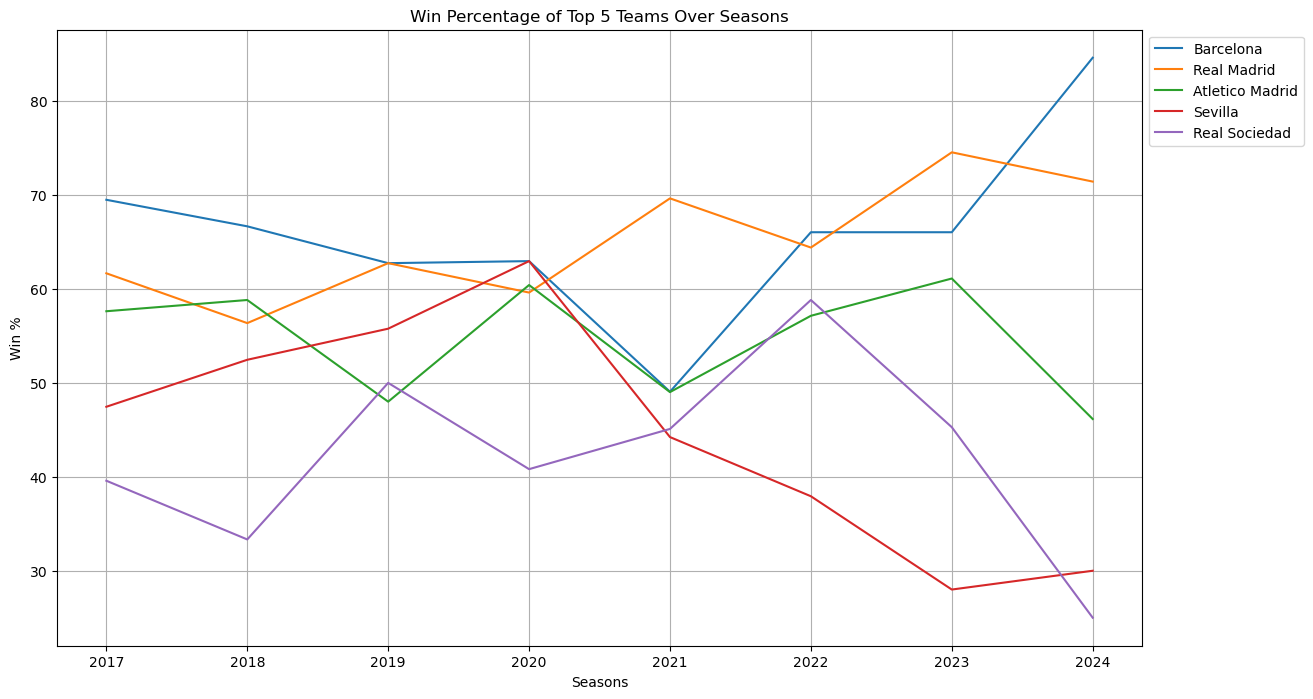

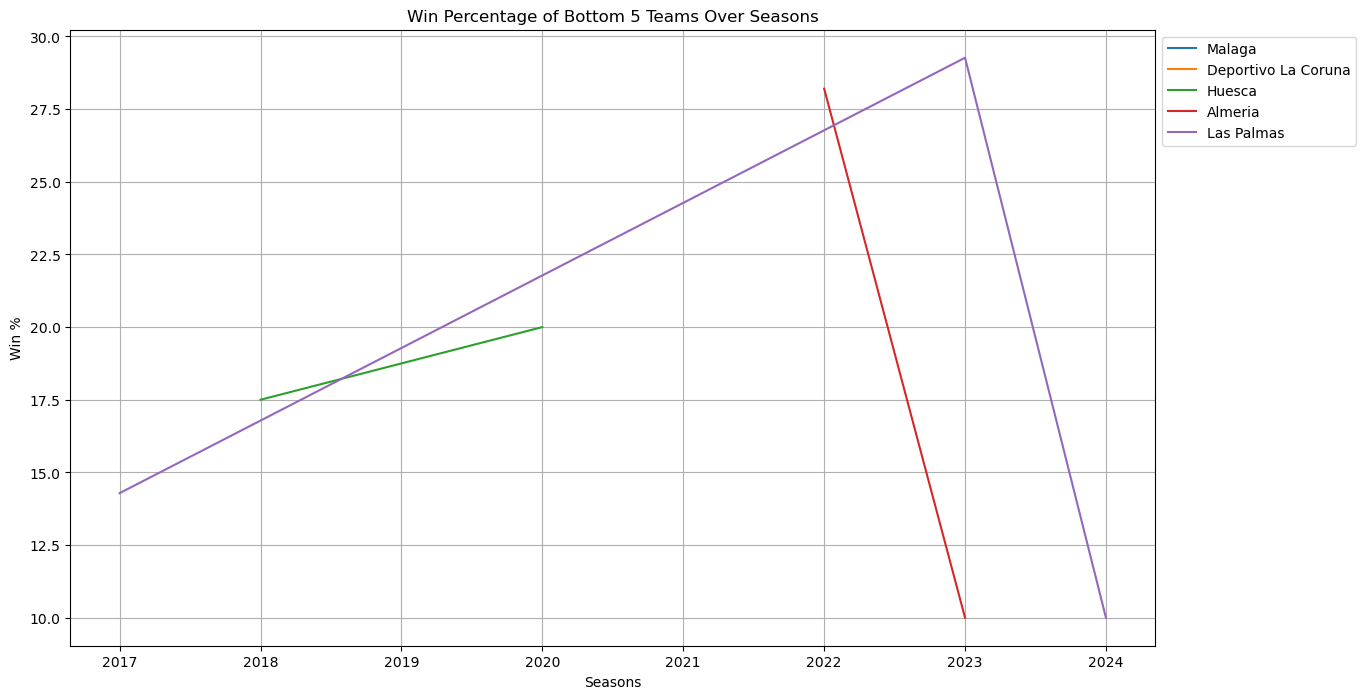

In [50]:
import matplotlib.pyplot as plt

# Plot the first 5 best teams
plt.figure(figsize=(14, 8))
for team in results.sort_values(by='Win %', ascending=False)['Team'].head(5):
    team_data = df[df['Team'] == team]
    win_percentage = team_data.groupby('Season')['Result'].apply(lambda x: (x == 'W').mean() * 100)
    plt.plot(win_percentage.index, win_percentage.values, label=team)

plt.xlabel('Seasons')
plt.ylabel('Win %')
plt.title('Win Percentage of Top 5 Teams Over Seasons')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Plot the 5 worst teams
plt.figure(figsize=(14, 8))
for team in results.sort_values(by='Win %', ascending=True)['Team'].head(5):
    team_data = df[df['Team'] == team]
    win_percentage = team_data.groupby('Season')['Result'].apply(lambda x: (x == 'W').mean() * 100)
    plt.plot(win_percentage.index, win_percentage.values, label=team)

plt.xlabel('Seasons')
plt.ylabel('Win %')
plt.title('Win Percentage of Bottom 5 Teams Over Seasons')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()